In [1]:
import pandas as pd

# How to Combine Data from Multiple Tables

In [2]:
air_quality_no2 = pd.read_csv(r"data/air_quality_no2_long.csv", parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [3]:
air_quality_pm25 = pd.read_csv(r"data/air_quality_pm25_long.csv", parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


## How to Combine Data from Multiple Tables

### Concatenating Objects

In [4]:
air_quality = pd.concat([air_quality_pm25,air_quality_no2], axis=0) #concat() occurs along axis=0 by default
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [5]:
print("Shape of air_quality_pm25:", air_quality_pm25.shape)
print("Shape of air_quality_no2:", air_quality_no2.shape)
print("Shape of air_quality:", air_quality.shape)
print("1110 + 2068 =", 1110+2068, "rows")

Shape of air_quality_pm25: (1110, 4)
Shape of air_quality_no2: (2068, 4)
Shape of air_quality: (3178, 4)
1110 + 2068 = 3178 rows


### **Note:**

The `axis` argument will return in a number of pandas methods that can be applied **along an axis**. 

A DataFrame has two corresponding axes: 
* the first running vertically downwards across rows (axis 0)
* the second running horizontally across columns (axis 1)

Most operations like concatenation or summary statistics are by default across rows (axis 0), but can be applied across columns as well.

In [6]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


**Using the `keys` parameter with `concat` can help to differentiate the two source tables in the new table:**

In [7]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])
air_quality_

date.utc            location parameter  value
PM25 0     2019-06-18 06:00:00+00:00             BETR801      pm25   18.0
     1     2019-06-17 08:00:00+00:00             BETR801      pm25    6.5
     2     2019-06-17 07:00:00+00:00             BETR801      pm25   18.5
     3     2019-06-17 06:00:00+00:00             BETR801      pm25   16.0
     4     2019-06-17 05:00:00+00:00             BETR801      pm25    7.5
...                              ...                 ...       ...    ...
NO2  2063  2019-05-07 06:00:00+00:00  London Westminster       no2   26.0
     2064  2019-05-07 04:00:00+00:00  London Westminster       no2   16.0
     2065  2019-05-07 03:00:00+00:00  London Westminster       no2   19.0
     2066  2019-05-07 02:00:00+00:00  London Westminster       no2   19.0
     2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0

[3178 rows x 4 columns]

## How to Join Tables Using a Common Identifier

**Note: attaching images because the .csv files for this section are not available for easy download**

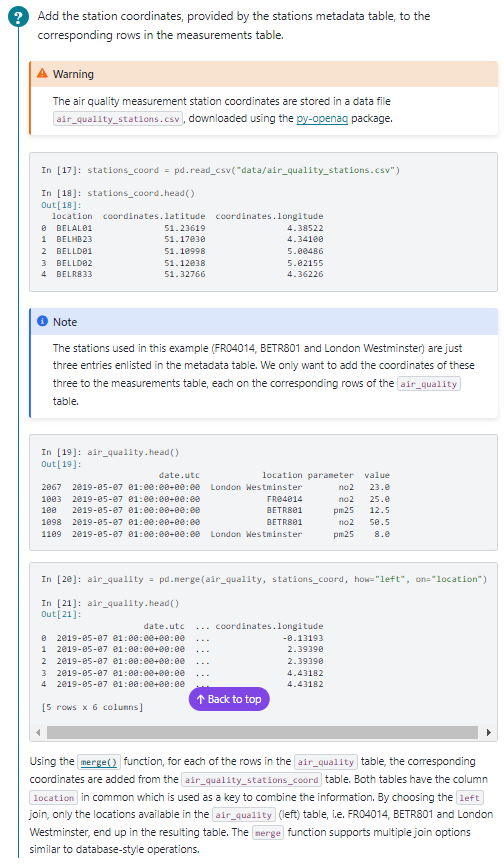

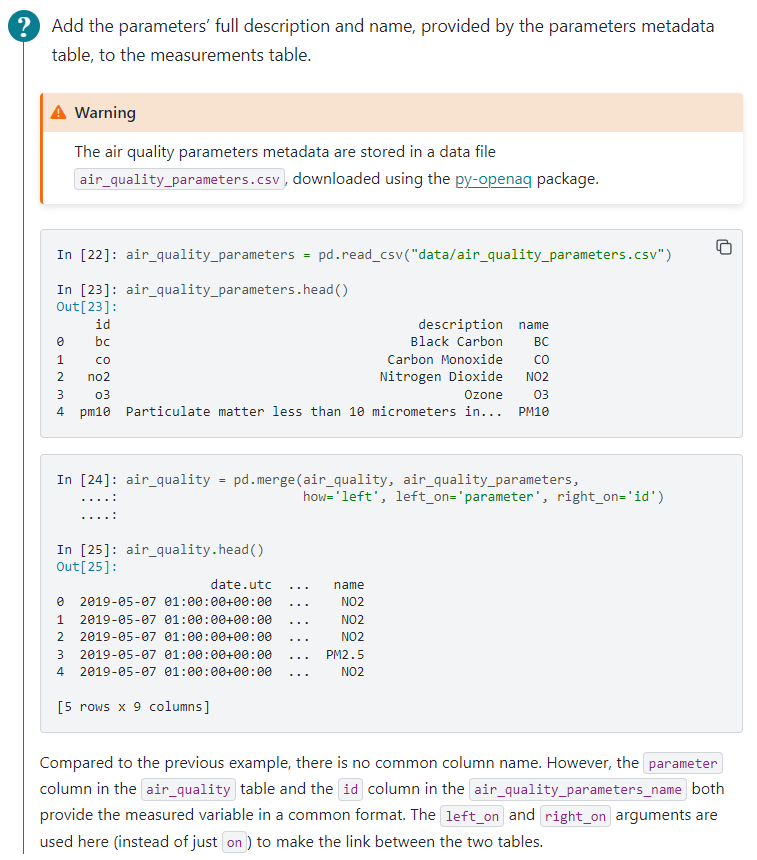

## Summary
* Multiple tables can be concatenated both column-wise and row-wise using the `concat` function.
* For database-like merging/joining of tables, use the `merge` function.